In [45]:
import pandas as pd 
df = pd.read_csv('/Users/rickeydidio/Desktop/Development/NBA/Second_Round_Picks.csv', header=0)
df.head(3)

,Rk,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,NBA,2,31,POR,James White\whiteja02,23.256,G-F,us,Cincinnati,...,1.0,0.5,0.3,0.1,0.438,0.482,0.340,0.676,0.8,0.062
1,2,NBA,2,32,HOU,Steve Novak\novakst01,23.021,F,us,Marquette,...,1.3,0.3,0.2,0.1,0.437,0.463,0.430,0.877,14.5,0.123
2,3,NBA,2,33,ATL,Solomon Jones\jonesso01,21.352,F,us,South Florida,...,2.3,0.4,0.2,0.5,0.467,0.472,0.111,0.717,5.0,0.078


In [46]:
print(df.columns)

Index(['Rk', 'Lg', 'Rd', 'Pk', 'Tm', 'Player', 'Age', 'Pos', 'Born', 'College',
       'From', 'To', 'Year', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK',
       'FG%', '2P%', '3P%', 'FT%', 'WS', 'WS/48'],
      dtype='object')


In [47]:
from matplotlib import pyplot as plt

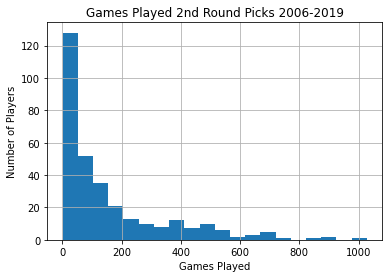

In [55]:
df.hist("G", bins=20)
plt.title("Games Played 2nd Round Picks 2006-2019")
plt.xlabel("Games Played")
plt.ylabel("Number of Players")
plt.show()